In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고 메시지를 나오지 않도록 한다.
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정 - 윈도우 
plt.rcParams['font.family'] = 'Malgun Gothic'

# 글자 크기
plt.rcParams['font.size'] = 15

# 폰트 설정 시 - 기호 깨는 거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 그래프의 크기
plt.rcParams['figure.figsize'] = 16,8

In [ ]:
matzip = pd.read_csv('data2/matzipData.csv')
matzip

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,만원-2만원,주차공간없음,17:00 - 01:30,일
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,NaN
397,코블러,4,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,만원-2만원,유료주차 가능,19:00 - 03:00,일
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,NaN


# 1.맛집 데이터 처리

In [ ]:
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

# 2.결측치 처리


- 휴일에 대한 결측치 처리

In [ ]:
matzip['Holiday'].fillna('연중무휴',inplace=True)
matzip['Holiday'].isna().sum()

0

- 가격에 대한 결측치와 결측치 처리

In [ ]:
# 가격 데이터 확인
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [ ]:
# 결측치 확인
matzip['Price'].isna().sum()

3

In [ ]:
# 결측치 10000으로 채움
# 이유는 그냥..
# 앞으로 가격을 숫자 값으로 변환 할 것이다.
# 가장 작은 값을 10000으로 할 것이기 때문에 10000으로 설정한다.
matzip['Price'].fillna('10000',inplace=True)
matzip['Price'].isna().sum()

0

In [ ]:
# 값을 변경한다.
# 만원이라는 글자를 10000으로 변경한다.
matzip['Price'] = matzip['Price'].str.replace('만원','10000')
matzip['Price'] = matzip['Price'].str.replace('210000','20000')
matzip['Price'] = matzip['Price'].str.replace('310000','30000')
matzip['Price'] = matzip['Price'].str.replace('410000','40000')

# 10000- 를 길이가 0인 문자열로 바꾼다
matzip['Price'] = matzip['Price'].str.replace('10000-','')
matzip['Price'] = matzip['Price'].str.replace('20000-','')
matzip['Price'] = matzip['Price'].str.replace('30000-','')

# 이상, 미만을 길이가 0인 문자열로 바꾼다.
matzip['Price'] = matzip['Price'].str.replace('이상','')
matzip['Price'] = matzip['Price'].str.replace('미만','')

# 공백 제가
matzip['Price'] = matzip['Price'].str.strip()

matzip['Price'].value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

In [ ]:
# 변경 후 타입을 확인한다.
matzip['Price'].dtype

dtype('O')

In [ ]:
# 숫자로 변경한다.
matzip['Price'] = matzip['Price'].astype('int64')
matzip['Price']

0      20000
1      30000
2      40000
3      40000
4      10000
       ...  
395    20000
396    20000
397    20000
398    10000
399    10000
Name: Price, Length: 400, dtype: int64

- 평점

In [ ]:
# 평점에 저장되어 있는 데이터 학인
matzip['Rating'].value_counts()

-      155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.4      4
3.6      4
4.7      3
3.8      2
3.2      1
2.7      1
3.1      1
Name: Rating, dtype: int64

In [ ]:
matzip['Rating'].isna().sum()

0

In [ ]:
# - 를 0.0으로 변경한다.
matzip['Rating'] = matzip['Rating'].str.replace('-','0.0')
matzip['Rating'].value_counts()

0.0    155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.4      4
3.6      4
4.7      3
3.8      2
3.2      1
2.7      1
3.1      1
Name: Rating, dtype: int64

In [ ]:
matzip['Rating'].dtype

dtype('O')

In [ ]:
matzip['Rating'] = matzip['Rating'].astype('float64')
matzip['Rating'].dtype

dtype('float64')

- 전화번호

In [ ]:
matzip['Tel'].isna().sum()

50

In [ ]:
matzip['Tel'].fillna('번호없음',inplace=True)
matzip['Tel'].isna().sum()

0

- 주차공간

In [ ]:
matzip['Parking'].isna().sum()

71

In [ ]:
matzip['Parking'].value_counts()

주차공간없음                199
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 1시간 무료          1
무료주차 가능 당일 무료           1
유료주차 가능 주차권 2시간 제공      1
유료주차 가능 1.5시간 무료        1
Name: Parking, dtype: int64

In [ ]:
matzip['Parking'].fillna('주차공간없음',inplace=True)
matzip['Parking'].isna().sum()

0

- 영업 시간

In [ ]:
# 결측치 확인
matzip['Operating Time'].isna().sum()

36

In [ ]:
matzip['Operating Time'].value_counts()

11:00 - 22:00                          25
11:30 - 22:00                          15
11:30 - 21:30                          15
00:00 - 24:00                          12
11:00 - 21:00                          11
                                       ..
10:30 - 01:00                           1
화-토: 12:00 - 22:00 일: 12:00 - 21:00     1
13:00 - 02:00                           1
10:30 - 06:00                           1
16:00 - 06:00                           1
Name: Operating Time, Length: 204, dtype: int64

In [ ]:
matzip['Operating Time'].fillna('00:00 - 24:00',inplace=True)
matzip['Operating Time'].isna().sum()

0

In [ ]:
matzip.isna().sum()

Restaurant Name    0
Rating             0
Address            0
Tel                0
Food               0
Price              0
Parking            0
Operating Time     0
Holiday            0
dtype: int64

# 3.데이터 분석

# 4.가격 분포 확인

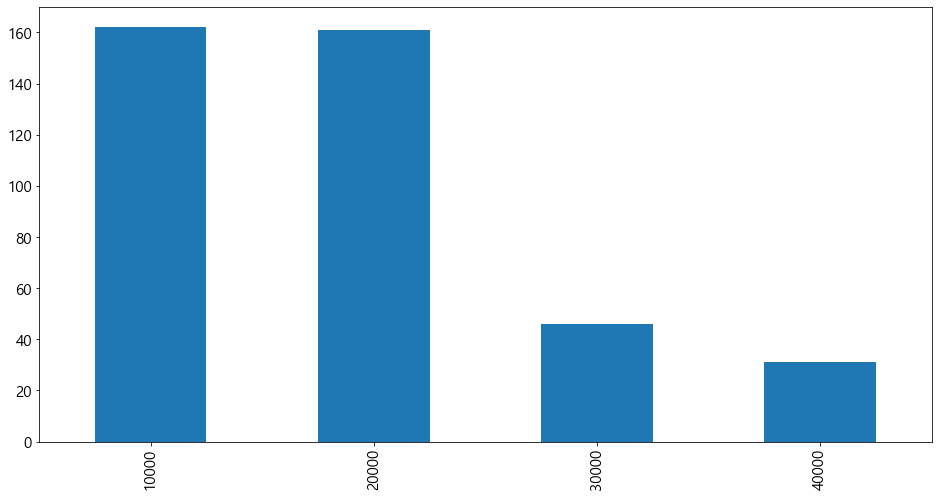

In [ ]:
# 막대 그래프
# 컬럼의 값의 종류가 적을 경우(카테고리형 데이터)
# 컬럼에 저장되어 있는 값 종류별 양을 비교할 때
a1 = matzip['Price'].value_counts()

a1.plot.bar()
plt.show()

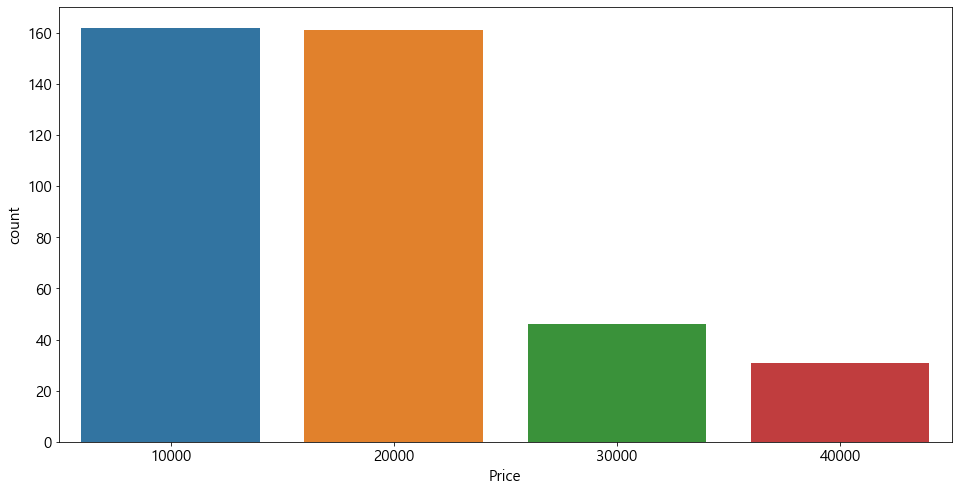

In [ ]:
sns.countplot(x='Price',data=matzip)
plt.show()

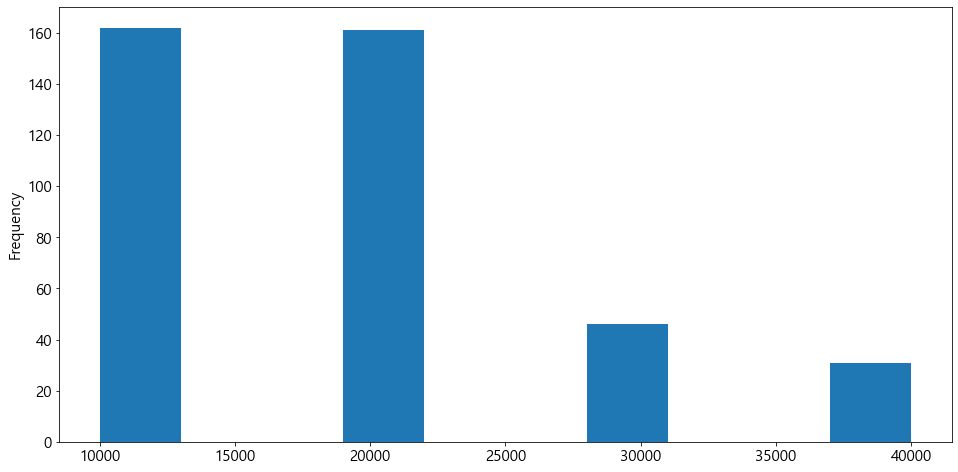

In [ ]:
# 히스토그램 
# 범위형 데이터의 분포를 보고자 힐 때 사용한다.
# 최소와 최대안에서 주어진 그룹의 개수만큼 범위를 분할하여
# 각 범위안에 해당하는 데이터의 개수를 시각화한다.
# 분포, 왜도, 첨도, 밀도 등등 통계에서 많이 사용하는 그래프이다.

matzip['Price'].plot.hist()
plt.show()

10000,20000원 대가 많고 30000,40000원 대는 적다

# 5.주차 공간과 평점간의 관계..

In [ ]:
# 주차 공간의 분포를 확인한다.
# 문자열 데이터를 가지고 범위를 잡아 그룹을 나누는 것 자체가
# 말이 되지 않기 떄문에 오류가 발생한다.
matzip['Parking'].plot.hist()

plt.show()

TypeError: no numeric data to plot

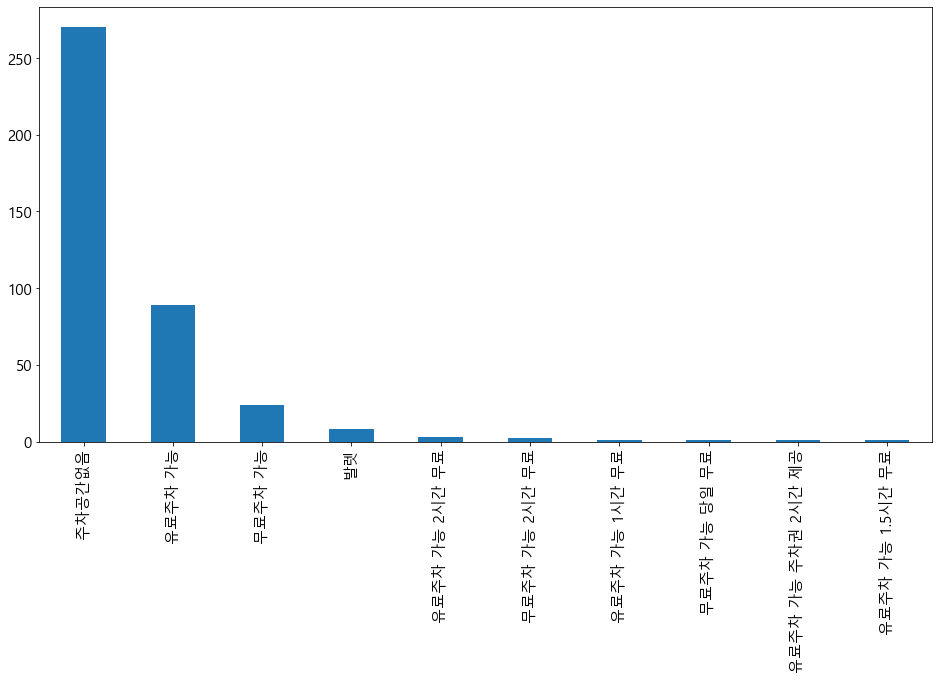

In [ ]:
matzip['Parking'].value_counts().plot.bar()
plt.show()

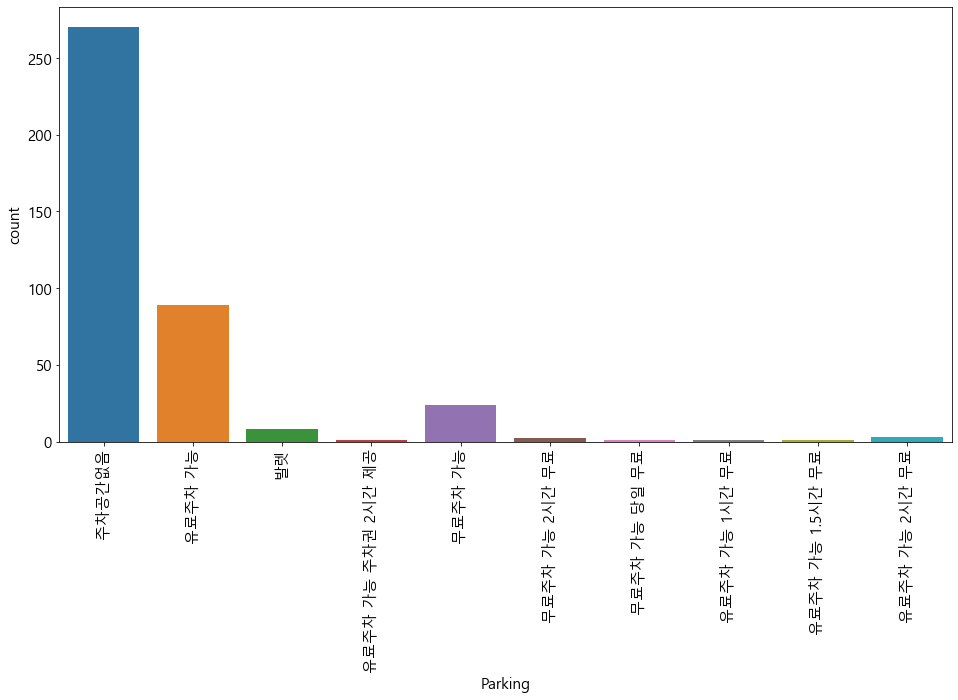

In [ ]:
sns.countplot(x='Parking',data=matzip)
plt.xticks(rotation=90)
plt.show()

In [ ]:
a1 = matzip['Parking'].value_counts().index
a1

Index(['주차공간없음', '유료주차 가능', '무료주차 가능', '발렛', '유료주차 가능 2시간 무료',
       '무료주차 가능 2시간 무료', '유료주차 가능 1시간 무료', '무료주차 가능 당일 무료',
       '유료주차 가능 주차권 2시간 제공', '유료주차 가능 1.5시간 무료'],
      dtype='object')

In [ ]:
# 평점이 0.0인 것은 제거한다
idx2 = matzip.query('Rating == 0.0').index

matzip_temp = matzip.drop(idx2)
matzip_temp

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,20000,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,30000,유료주차 가능,11:30 - 21:30,연중무휴
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,40000,주차공간없음,월-토: 11:30 - 23:00 일: 17:30 - 23:00,연중무휴
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,40000,발렛,06:00 - 22:00,연중무휴
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,10000,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4.0,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,20000,주차공간없음,17:00 - 01:30,일
396,옴,4.0,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,20000,주차공간없음,11:00 - 22:00,연중무휴
397,코블러,4.0,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,20000,유료주차 가능,19:00 - 03:00,일
398,클류치,4.0,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,10000,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,연중무휴


주차공간없음 : 4.106000000000003


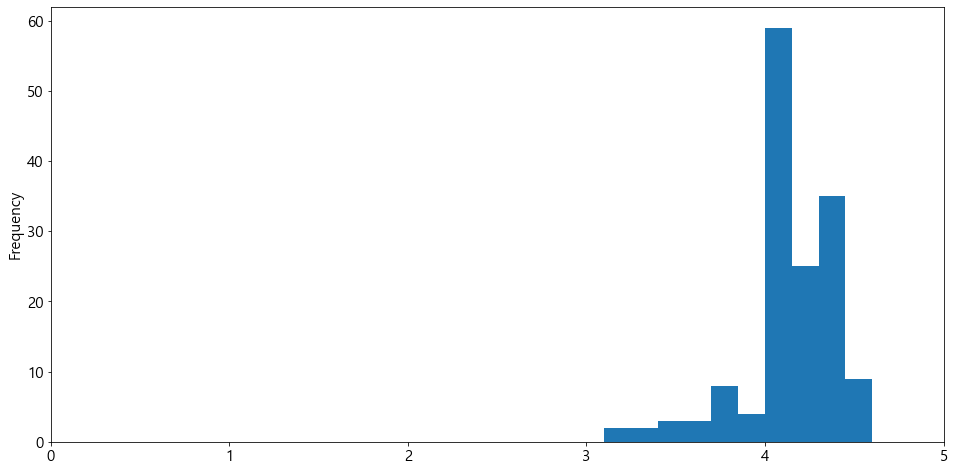

유료주차 가능 : 4.090163934426228


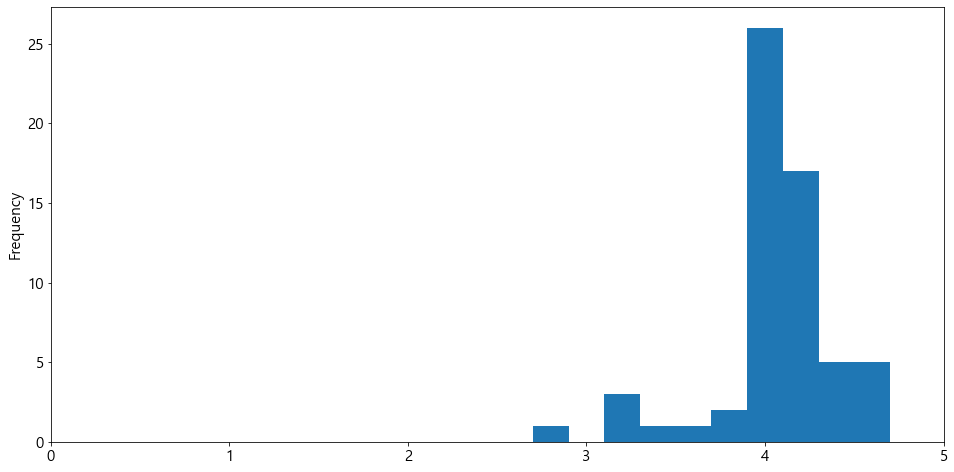

무료주차 가능 : 4.173684210526316


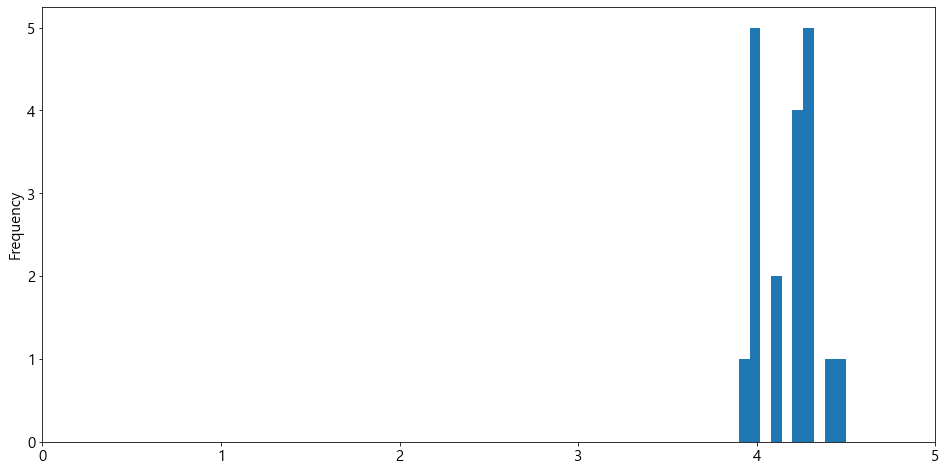

발렛 : 4.1875


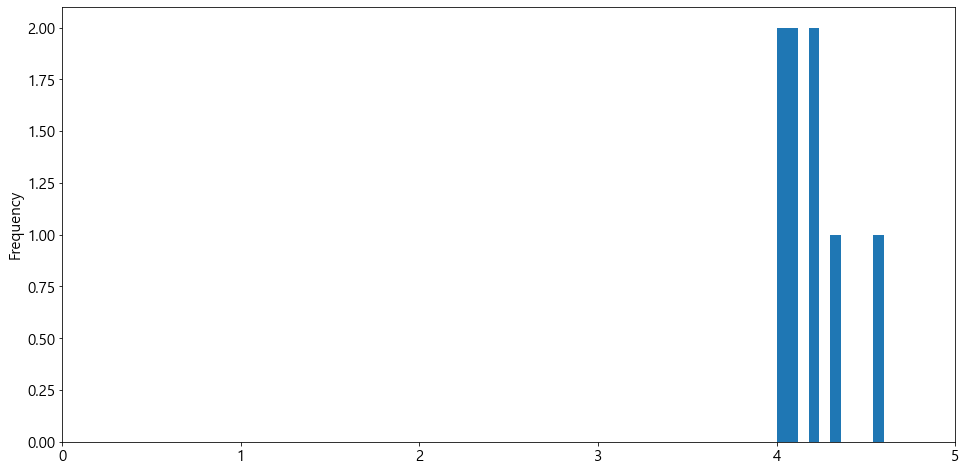

유료주차 가능 2시간 무료 : 4.066666666666666


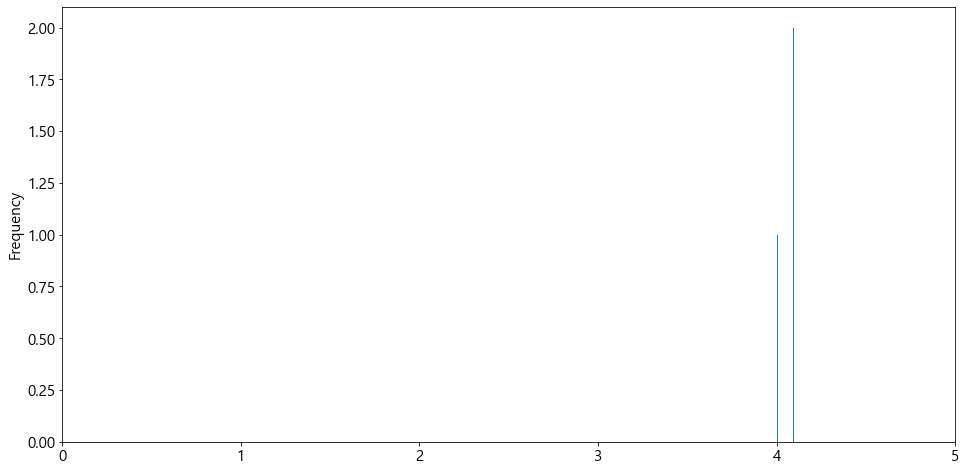

무료주차 가능 2시간 무료 : 4.7


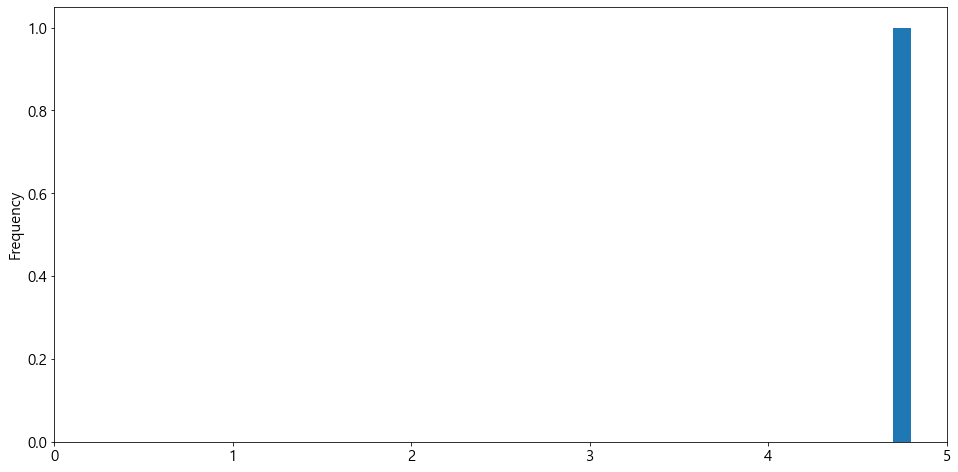

유료주차 가능 1시간 무료 : 4.4


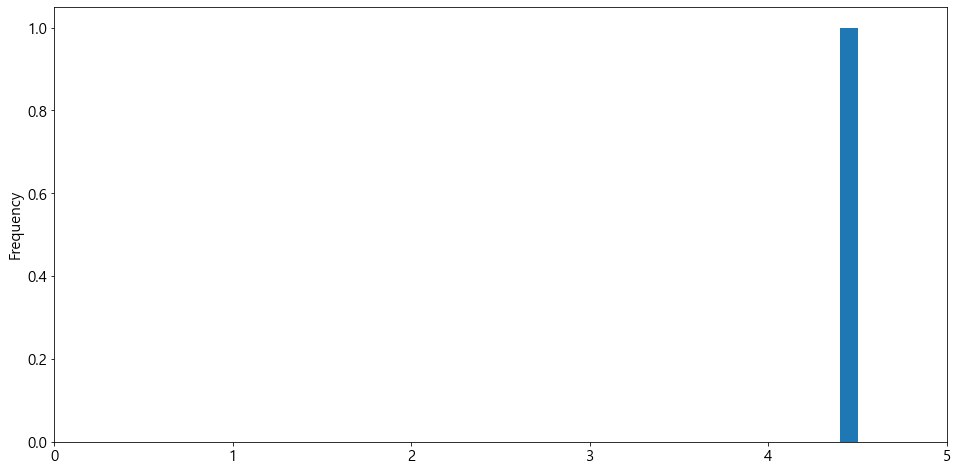

무료주차 가능 당일 무료 : nan


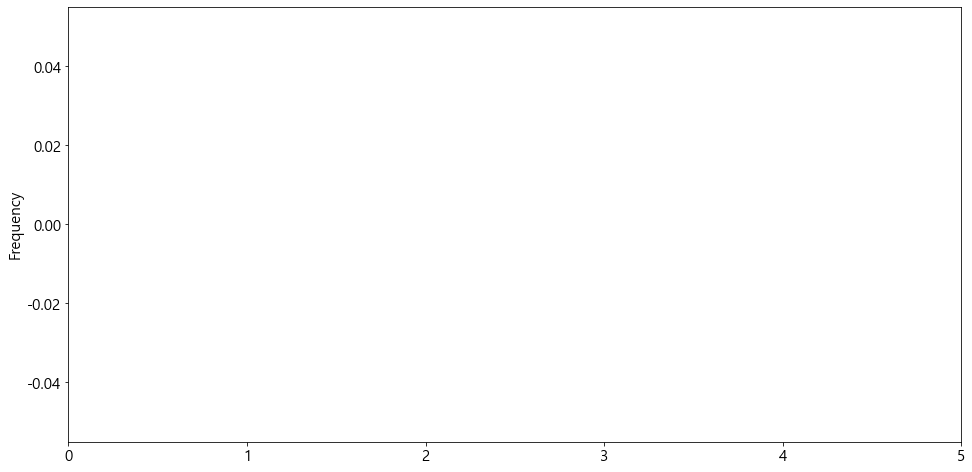

유료주차 가능 주차권 2시간 제공 : 4.1


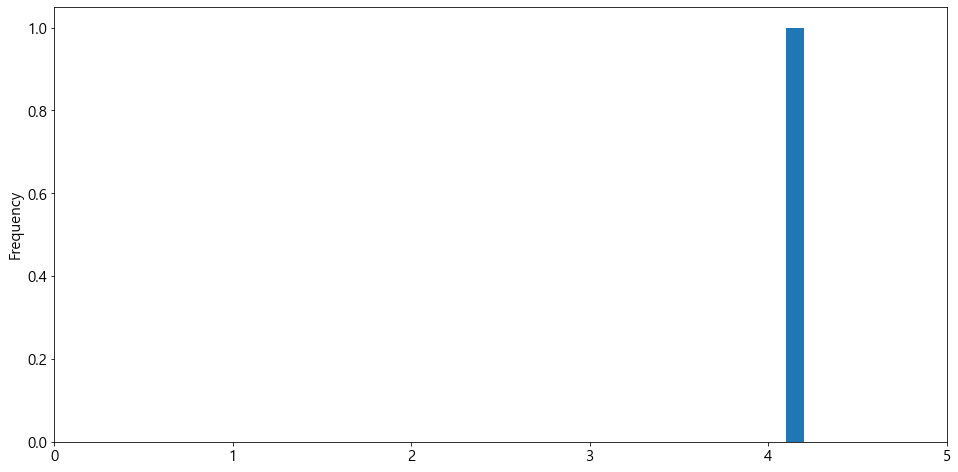

유료주차 가능 1.5시간 무료 : 4.4


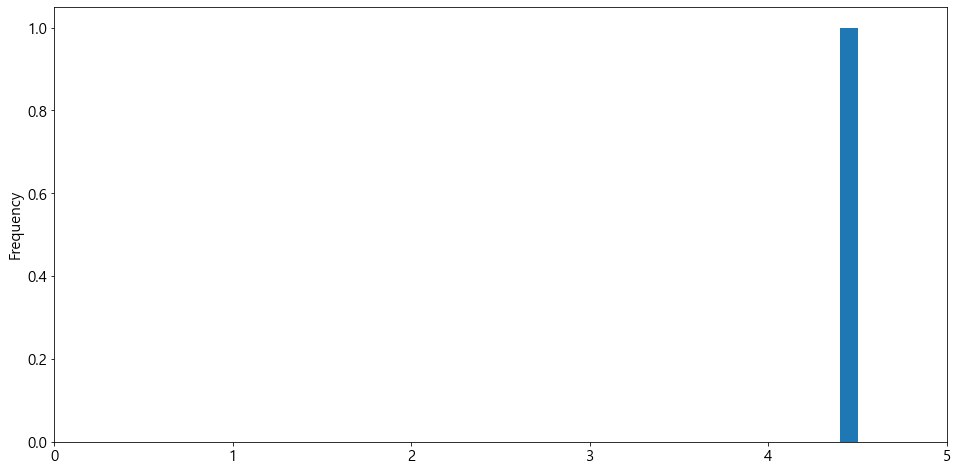

In [ ]:
for value in a1:
#     print(value)
    # 각 값에 해당하는 로우의 인덱스를 가져온다
    idx = matzip_temp.query('Parking == @value').index
    
    rating = matzip_temp.loc[idx, 'Rating']
#     display(rating)
    rating_mean = rating.mean()
    
    print(f'{value} : {rating_mean}')
    
    # 평점 분포를 확인한다.
    rating.plot.hist()
    plt.xlim(0,5)
    plt.show()
